## Imports

In [2]:
import sys
sys.path.append("..")

import os
import numpy as np
import matplotlib.pyplot as plt

from src.preprocessing import AudioPreprocessor
from src.train import ModelTrainer, compare_models
from src.config import RESULTS_PATH

## Loading data

In [4]:
preprocessor = AudioPreprocessor()
processed_data = preprocessor.load_processed_data("ravdess_processed.pkl")

Loaded processed data from: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\data\processed\ravdess_processed.pkl
Training samples: 2304
Test samples: 576
Feature dimension: 382


## CNN Model

## Training model

In [5]:
print("TRAINING CNN MODEL...")
trainer_cnn = ModelTrainer(processed_data)
history_cnn = trainer_cnn.train(
    model_type="cnn",
    num_filters=[64, 128, 256],
    dropout_rate=0.3,
    batch_size=32,
    epochs=100,
    validation_split=0.2
)

TRAINING CNN MODEL...

Building CNN model...

MODEL: CNN_1D


Model: "CNN_1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 382, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv_1 (BatchNormalization)  │ (None, 382, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_1 (MaxPooling1D)        │ (None, 191, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_conv_1 (Dropout)        │ (None, 191, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 191, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv_2 (BatchNormalization)  │ (None, 191, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_2 (MaxPooling1D)        │ (None, 95, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_conv_2 (Dropout)        │ (None, 95, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 95, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv_3 (BatchNormalization)  │ (None, 95, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_3 (MaxPooling1D)        │ (None, 47, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_conv_3 (Dropout)        │ (None, 47, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12032)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     1,540,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_dense (BatchNormalization)   │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense (Dropout)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,667,080 (6.36 MB)

 Trainable params: 1,665,928 (6.36 MB)

 Non-trainable params: 1,152 (4.50 KB)

Total parameters: 1,667,080
Trainable parameters: 1,665,928


Training CNN model...
Training samples: 2304
Validation split: 0.2
Batch size: 32
Max epochs: 100
Epoch 1/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3085 - loss: 2.3467
Epoch 1: val_accuracy improved from None to 0.14317, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5



Epoch 1: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.4080 - loss: 1.8324 - val_accuracy: 0.1432 - val_loss: 3.1420 - learning_rate: 0.0010
Epoch 2/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5983 - loss: 1.1484
Epoch 2: val_accuracy did not improve from 0.14317
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5979 - loss: 1.1463 - val_accuracy: 0.1323 - val_loss: 4.9948 - learning_rate: 0.0010
Epoch 3/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6638 - loss: 0.9268
Epoch 3: val_accuracy did not improve from 0.14317
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6804 - loss: 0.8957 - val_accuracy: 0.1410 - val_loss: 4.1258 - learning_rate: 0.0010
Epoch 4/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7644 - loss: 0.6927
Epoch 4: val_accuracy improved from 0.14317 to 0.14534, saving


Epoch 4: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.7499 - loss: 0.7081 - val_accuracy: 0.1453 - val_loss: 3.9896 - learning_rate: 0.0010
Epoch 5/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8249 - loss: 0.5254
Epoch 5: val_accuracy improved from 0.14534 to 0.19089, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5



Epoch 5: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.8074 - loss: 0.5612 - val_accuracy: 0.1909 - val_loss: 3.5401 - learning_rate: 0.0010
Epoch 6/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8503 - loss: 0.4572
Epoch 6: val_accuracy improved from 0.19089 to 0.27115, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5



Epoch 6: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8486 - loss: 0.4578 - val_accuracy: 0.2711 - val_loss: 3.0660 - learning_rate: 0.0010
Epoch 7/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8750 - loss: 0.3890
Epoch 7: val_accuracy improved from 0.27115 to 0.41649, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5



Epoch 7: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8790 - loss: 0.3903 - val_accuracy: 0.4165 - val_loss: 1.8377 - learning_rate: 0.0010
Epoch 8/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9032 - loss: 0.3045
Epoch 8: val_accuracy improved from 0.41649 to 0.57701, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5



Epoch 8: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8953 - loss: 0.3088 - val_accuracy: 0.5770 - val_loss: 1.2358 - learning_rate: 0.0010
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9050 - loss: 0.2730
Epoch 9: val_accuracy improved from 0.57701 to 0.70499, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5



Epoch 9: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9045 - loss: 0.2835 - val_accuracy: 0.7050 - val_loss: 0.8167 - learning_rate: 0.0010
Epoch 10/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9437 - loss: 0.2212
Epoch 10: val_accuracy improved from 0.70499 to 0.83731, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5



Epoch 10: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9425 - loss: 0.2183 - val_accuracy: 0.8373 - val_loss: 0.5645 - learning_rate: 0.0010
Epoch 11/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9526 - loss: 0.1738
Epoch 11: val_accuracy improved from 0.83731 to 0.83948, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5



Epoch 11: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9485 - loss: 0.1850 - val_accuracy: 0.8395 - val_loss: 0.5489 - learning_rate: 0.0010
Epoch 12/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9559 - loss: 0.1693
Epoch 12: val_accuracy improved from 0.83948 to 0.86117, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5



Epoch 12: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9544 - loss: 0.1651 - val_accuracy: 0.8612 - val_loss: 0.4435 - learning_rate: 0.0010
Epoch 13/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9670 - loss: 0.1458
Epoch 13: val_accuracy improved from 0.86117 to 0.87636, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5



Epoch 13: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9609 - loss: 0.1500 - val_accuracy: 0.8764 - val_loss: 0.4133 - learning_rate: 0.0010
Epoch 14/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9665 - loss: 0.1421
Epoch 14: val_accuracy improved from 0.87636 to 0.88937, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5



Epoch 14: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9615 - loss: 0.1488 - val_accuracy: 0.8894 - val_loss: 0.3729 - learning_rate: 0.0010
Epoch 15/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9585 - loss: 0.1541
Epoch 15: val_accuracy did not improve from 0.88937
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9593 - loss: 0.1488 - val_accuracy: 0.8829 - val_loss: 0.4074 - learning_rate: 0.0010
Epoch 16/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9679 - loss: 0.1303
Epoch 16: val_accuracy did not improve from 0.88937
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9653 - loss: 0.1292 - val_accuracy: 0.8872 - val_loss: 0.3861 - learning_rate: 0.0010
Epoch 17/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9750 - loss: 0.1043
Epoch 17: val_accuracy did not improve from 0.88937
58/5


Epoch 19: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9729 - loss: 0.0938 - val_accuracy: 0.8915 - val_loss: 0.3563 - learning_rate: 0.0010
Epoch 20/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9818 - loss: 0.0804
Epoch 20: val_accuracy did not improve from 0.89154
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9821 - loss: 0.0798 - val_accuracy: 0.8872 - val_loss: 0.3367 - learning_rate: 0.0010
Epoch 21/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9820 - loss: 0.0652
Epoch 21: val_accuracy improved from 0.89154 to 0.90239, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5



Epoch 21: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9826 - loss: 0.0670 - val_accuracy: 0.9024 - val_loss: 0.3593 - learning_rate: 0.0010
Epoch 22/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9839 - loss: 0.0583
Epoch 22: val_accuracy did not improve from 0.90239
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9826 - loss: 0.0603 - val_accuracy: 0.8959 - val_loss: 0.3523 - learning_rate: 0.0010
Epoch 23/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9853 - loss: 0.0573
Epoch 23: val_accuracy improved from 0.90239 to 0.90456, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5



Epoch 23: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9859 - loss: 0.0597 - val_accuracy: 0.9046 - val_loss: 0.3504 - learning_rate: 0.0010
Epoch 24/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9840 - loss: 0.0560
Epoch 24: val_accuracy did not improve from 0.90456
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9826 - loss: 0.0598 - val_accuracy: 0.8807 - val_loss: 0.3966 - learning_rate: 0.0010
Epoch 25/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9859 - loss: 0.0520
Epoch 25: val_accuracy did not improve from 0.90456

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9821 - loss: 0.0610 - val_accuracy: 0.8872 - val_loss: 0.3665 - learning_rate: 0.0010
Epoch 26/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 


Epoch 31: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9962 - loss: 0.0239 - val_accuracy: 0.9089 - val_loss: 0.3515 - learning_rate: 2.5000e-04
Epoch 32/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9964 - loss: 0.0282
Epoch 32: val_accuracy did not improve from 0.90889
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9957 - loss: 0.0269 - val_accuracy: 0.9067 - val_loss: 0.3479 - learning_rate: 2.5000e-04
Epoch 33/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9978 - loss: 0.0182
Epoch 33: val_accuracy improved from 0.90889 to 0.91323, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5



Epoch 33: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9973 - loss: 0.0198 - val_accuracy: 0.9132 - val_loss: 0.3349 - learning_rate: 2.5000e-04
Epoch 34/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9993 - loss: 0.0179
Epoch 34: val_accuracy did not improve from 0.91323
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9989 - loss: 0.0174 - val_accuracy: 0.9089 - val_loss: 0.3402 - learning_rate: 2.5000e-04
Epoch 35/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9958 - loss: 0.0195
Epoch 35: val_accuracy did not improve from 0.91323
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9957 - loss: 0.0196 - val_accuracy: 0.9111 - val_loss: 0.3388 - learning_rate: 2.5000e-04
Epoch 36/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9966 - loss: 0.0170
Epoch 36: val_accuracy improved from 0.91323


Epoch 36: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9962 - loss: 0.0199 - val_accuracy: 0.9176 - val_loss: 0.3294 - learning_rate: 2.5000e-04
Epoch 37/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9990 - loss: 0.0147
Epoch 37: val_accuracy did not improve from 0.91757
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9984 - loss: 0.0154 - val_accuracy: 0.9111 - val_loss: 0.3490 - learning_rate: 2.5000e-04
Epoch 38/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9967 - loss: 0.0159
Epoch 38: val_accuracy did not improve from 0.91757
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9973 - loss: 0.0155 - val_accuracy: 0.9132 - val_loss: 0.3495 - learning_rate: 2.5000e-04
Epoch 39/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9981 - loss: 0.0132
Epoch 39: val_accuracy did not improve from 

## Evaluation

Training history plot saved to: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\plots\cnn_training_history.png


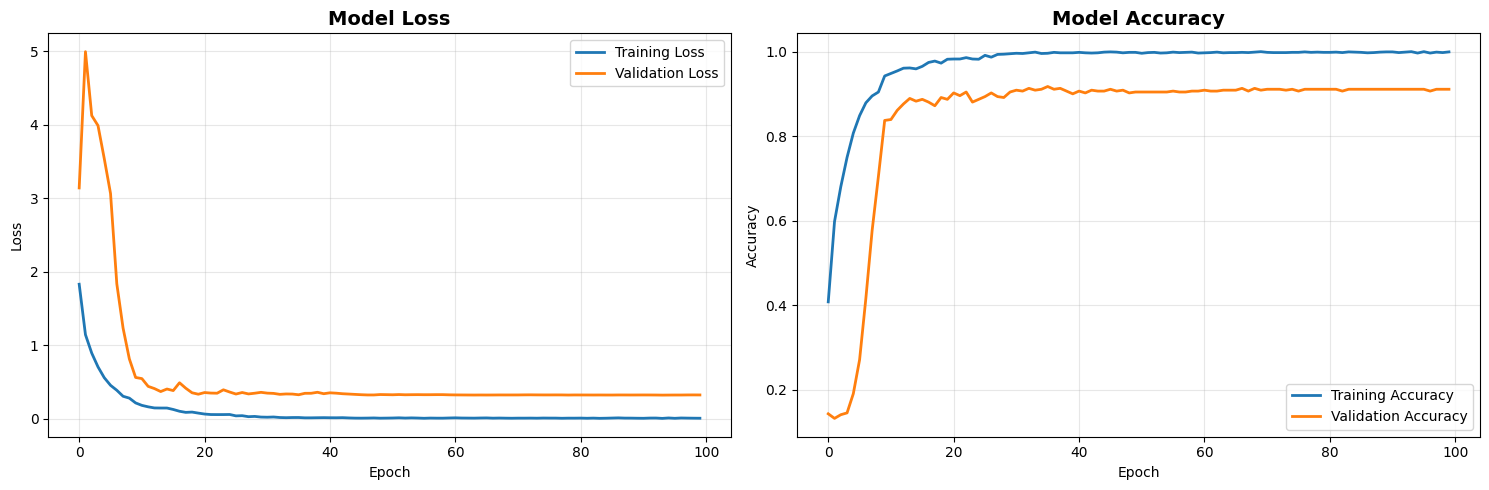

Confusion matrix saved to: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\plots\cnn_confusion_matrix.png


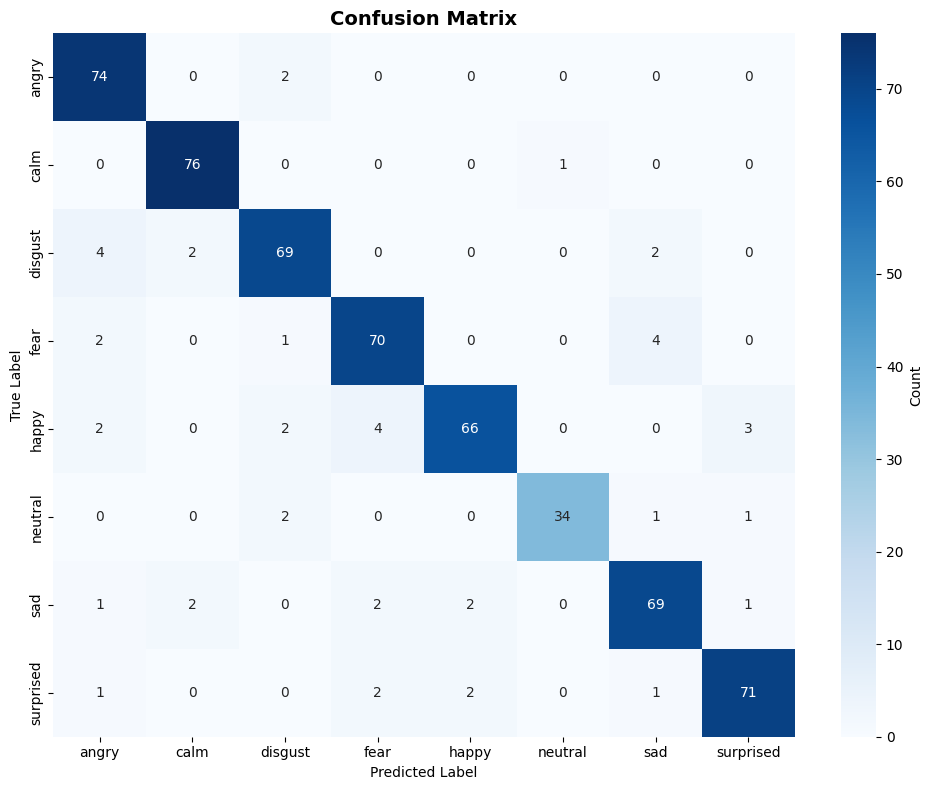


Normalized Confusion Matrix:
           angry   calm  disgust   fear  happy  neutral    sad  surprised
angry      0.974  0.000    0.026  0.000  0.000    0.000  0.000      0.000
calm       0.000  0.987    0.000  0.000  0.000    0.013  0.000      0.000
disgust    0.052  0.026    0.896  0.000  0.000    0.000  0.026      0.000
fear       0.026  0.000    0.013  0.909  0.000    0.000  0.052      0.000
happy      0.026  0.000    0.026  0.052  0.857    0.000  0.000      0.039
neutral    0.000  0.000    0.053  0.000  0.000    0.895  0.026      0.026
sad        0.013  0.026    0.000  0.026  0.026    0.000  0.896      0.013
surprised  0.013  0.000    0.000  0.026  0.026    0.000  0.013      0.922


In [6]:
y_pred_cnn, y_true = trainer_cnn.evaluate(model_type="cnn")
trainer_cnn.plot_training_history(save_path=os.path.join(RESULTS_PATH, "plots", "cnn_training_history.png"))
trainer_cnn.plot_confusion_matrix(y_pred_cnn, y_true, save_path=os.path.join(RESULTS_PATH, "plots", "cnn_confusion_matrix.png"))

In [7]:
trainer_cnn.print_classification_report(y_pred_cnn, y_true)
trainer_cnn.save_results("cnn", y_pred_cnn, y_true)


CLASSIFICATION REPORT
              precision    recall  f1-score   support

       angry     0.8810    0.9737    0.9250        76
        calm     0.9500    0.9870    0.9682        77
     disgust     0.9079    0.8961    0.9020        77
        fear     0.8974    0.9091    0.9032        77
       happy     0.9429    0.8571    0.8980        77
     neutral     0.9714    0.8947    0.9315        38
         sad     0.8961    0.8961    0.8961        77
   surprised     0.9342    0.9221    0.9281        77

    accuracy                         0.9184       576
   macro avg     0.9226    0.9170    0.9190       576
weighted avg     0.9194    0.9184    0.9181       576


Results saved:
  - History: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\cnn_history.pkl
  - Predictions: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\cnn_predictions.csv


In [8]:
from sklearn.metrics import accuracy_score

cnn_accuracy = accuracy_score(y_true, y_pred_cnn)
print(f"CNN Test Accuracy: {cnn_accuracy:.4f}")

CNN Test Accuracy: 0.9184


## LSTM Model

## Training

In [9]:
print("TRAINING LSTM MODEL...")
trainer_lstm = ModelTrainer(processed_data)
history_lstm = trainer_lstm.train(
    model_type="lstm",
    lstm_units=[128, 64],
    dropout_rate=0.3,
    batch_size=32,
    epochs=100,
    validation_split=0.2
)

TRAINING LSTM MODEL...

Building LSTM model...

MODEL: LSTM


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 382, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_lstm_1 (BatchNormalization)  │ (None, 382, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_lstm_2 (BatchNormalization)  │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense (Dropout)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,416 (474.28 KB)

 Trainable params: 121,032 (472.78 KB)

 Non-trainable params: 384 (1.50 KB)

Total parameters: 121,416
Trainable parameters: 121,032


Training LSTM model...
Training samples: 2304
Validation split: 0.2
Batch size: 32
Max epochs: 100
Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.1360 - loss: 2.3368
Epoch 1: val_accuracy improved from None to 0.19957, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5



Epoch 1: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 425ms/step - accuracy: 0.1693 - loss: 2.1833 - val_accuracy: 0.1996 - val_loss: 2.0511 - learning_rate: 0.0010
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.2183 - loss: 2.0368
Epoch 2: val_accuracy did not improve from 0.19957
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 410ms/step - accuracy: 0.2208 - loss: 2.0236 - val_accuracy: 0.1931 - val_loss: 2.0442 - learning_rate: 0.0010
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.2398 - loss: 1.9378
Epoch 3: val_accuracy improved from 0.19957 to 0.22777, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5



Epoch 3: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 422ms/step - accuracy: 0.2322 - loss: 1.9549 - val_accuracy: 0.2278 - val_loss: 2.0265 - learning_rate: 0.0010
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.2449 - loss: 1.9303
Epoch 4: val_accuracy did not improve from 0.22777
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 417ms/step - accuracy: 0.2469 - loss: 1.9308 - val_accuracy: 0.2256 - val_loss: 1.9988 - learning_rate: 0.0010
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.2299 - loss: 1.9236
Epoch 5: val_accuracy did not improve from 0.22777
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 424ms/step - accuracy: 0.2344 - loss: 1.9295 - val_accuracy: 0.2082 - val_loss: 1.9998 - learning_rate: 0.0010
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.2602 - loss: 1.8868
Epoch 6: val_accuracy improved from 0.22777 to 0.251


Epoch 6: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 419ms/step - accuracy: 0.2691 - loss: 1.8796 - val_accuracy: 0.2516 - val_loss: 1.9402 - learning_rate: 0.0010
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.2662 - loss: 1.8615
Epoch 7: val_accuracy improved from 0.25163 to 0.25597, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5



Epoch 7: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 426ms/step - accuracy: 0.2675 - loss: 1.8711 - val_accuracy: 0.2560 - val_loss: 1.9159 - learning_rate: 0.0010
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.2763 - loss: 1.8892
Epoch 8: val_accuracy improved from 0.25597 to 0.26464, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5



Epoch 8: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 450ms/step - accuracy: 0.2789 - loss: 1.8577 - val_accuracy: 0.2646 - val_loss: 1.8847 - learning_rate: 0.0010
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.2939 - loss: 1.8332
Epoch 9: val_accuracy improved from 0.26464 to 0.28633, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5



Epoch 9: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 27s 463ms/step - accuracy: 0.2919 - loss: 1.8266 - val_accuracy: 0.2863 - val_loss: 1.8496 - learning_rate: 0.0010
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.3047 - loss: 1.8030
Epoch 10: val_accuracy did not improve from 0.28633
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 441ms/step - accuracy: 0.2946 - loss: 1.8172 - val_accuracy: 0.2777 - val_loss: 1.8428 - learning_rate: 0.0010
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.2803 - loss: 1.8322
Epoch 11: val_accuracy did not improve from 0.28633
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 427ms/step - accuracy: 0.2952 - loss: 1.8212 - val_accuracy: 0.2755 - val_loss: 1.7958 - learning_rate: 0.0010
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.3162 - loss: 1.7593
Epoch 12: val_accuracy improved from 0.28633 to


Epoch 12: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 440ms/step - accuracy: 0.2973 - loss: 1.7958 - val_accuracy: 0.3037 - val_loss: 1.7618 - learning_rate: 0.0010
Epoch 13/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.2927 - loss: 1.8022
Epoch 13: val_accuracy improved from 0.30369 to 0.31236, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5



Epoch 13: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 422ms/step - accuracy: 0.2925 - loss: 1.7915 - val_accuracy: 0.3124 - val_loss: 1.7484 - learning_rate: 0.0010
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.2995 - loss: 1.7794
Epoch 14: val_accuracy improved from 0.31236 to 0.31453, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5



Epoch 14: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 435ms/step - accuracy: 0.2914 - loss: 1.7925 - val_accuracy: 0.3145 - val_loss: 1.7246 - learning_rate: 0.0010
Epoch 15/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.3171 - loss: 1.7612
Epoch 15: val_accuracy did not improve from 0.31453
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 434ms/step - accuracy: 0.3201 - loss: 1.7680 - val_accuracy: 0.3102 - val_loss: 1.7366 - learning_rate: 0.0010
Epoch 16/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.3408 - loss: 1.7340
Epoch 16: val_accuracy improved from 0.31453 to 0.32321, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5



Epoch 16: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 423ms/step - accuracy: 0.3239 - loss: 1.7611 - val_accuracy: 0.3232 - val_loss: 1.7396 - learning_rate: 0.0010
Epoch 17/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.3170 - loss: 1.7502
Epoch 17: val_accuracy did not improve from 0.32321
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 429ms/step - accuracy: 0.3310 - loss: 1.7396 - val_accuracy: 0.3210 - val_loss: 1.7194 - learning_rate: 0.0010
Epoch 18/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.3399 - loss: 1.7114
Epoch 18: val_accuracy improved from 0.32321 to 0.32755, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5



Epoch 18: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 437ms/step - accuracy: 0.3342 - loss: 1.7244 - val_accuracy: 0.3275 - val_loss: 1.6859 - learning_rate: 0.0010
Epoch 19/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.3255 - loss: 1.7369
Epoch 19: val_accuracy did not improve from 0.32755
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 430ms/step - accuracy: 0.3337 - loss: 1.7339 - val_accuracy: 0.2972 - val_loss: 1.7691 - learning_rate: 0.0010
Epoch 20/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.3546 - loss: 1.6986
Epoch 20: val_accuracy did not improve from 0.32755
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 444ms/step - accuracy: 0.3435 - loss: 1.7069 - val_accuracy: 0.3210 - val_loss: 1.6970 - learning_rate: 0.0010
Epoch 21/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.3592 - loss: 1.6858
Epoch 21: val_accuracy did not improve from 0.


Epoch 22: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 429ms/step - accuracy: 0.3538 - loss: 1.6920 - val_accuracy: 0.3536 - val_loss: 1.6476 - learning_rate: 0.0010
Epoch 23/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.3544 - loss: 1.6563
Epoch 23: val_accuracy did not improve from 0.35358
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 417ms/step - accuracy: 0.3435 - loss: 1.6925 - val_accuracy: 0.3232 - val_loss: 1.7213 - learning_rate: 0.0010
Epoch 24/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.3485 - loss: 1.7093
Epoch 24: val_accuracy did not improve from 0.35358
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 426ms/step - accuracy: 0.3521 - loss: 1.6945 - val_accuracy: 0.3232 - val_loss: 1.6874 - learning_rate: 0.0010
Epoch 25/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.3682 - loss: 1.6631
Epoch 25: val_accuracy improved from 0.35358 t


Epoch 25: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 427ms/step - accuracy: 0.3603 - loss: 1.6650 - val_accuracy: 0.3601 - val_loss: 1.6072 - learning_rate: 0.0010
Epoch 26/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.3983 - loss: 1.6174
Epoch 26: val_accuracy improved from 0.36009 to 0.37310, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5



Epoch 26: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 425ms/step - accuracy: 0.3766 - loss: 1.6413 - val_accuracy: 0.3731 - val_loss: 1.6141 - learning_rate: 0.0010
Epoch 27/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.3874 - loss: 1.6394
Epoch 27: val_accuracy did not improve from 0.37310
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 427ms/step - accuracy: 0.3700 - loss: 1.6693 - val_accuracy: 0.3471 - val_loss: 1.6567 - learning_rate: 0.0010
Epoch 28/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.3608 - loss: 1.6416
Epoch 28: val_accuracy did not improve from 0.37310
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 427ms/step - accuracy: 0.3766 - loss: 1.6422 - val_accuracy: 0.3579 - val_loss: 1.6528 - learning_rate: 0.0010
Epoch 29/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.3592 - loss: 1.6446
Epoch 29: val_accuracy did not improve from 0.


Epoch 30: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 420ms/step - accuracy: 0.3456 - loss: 1.6736 - val_accuracy: 0.3861 - val_loss: 1.5890 - learning_rate: 0.0010
Epoch 31/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.3950 - loss: 1.5873
Epoch 31: val_accuracy did not improve from 0.38612
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 427ms/step - accuracy: 0.3836 - loss: 1.6151 - val_accuracy: 0.3427 - val_loss: 1.6908 - learning_rate: 0.0010
Epoch 32/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.3936 - loss: 1.6188
Epoch 32: val_accuracy did not improve from 0.38612
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 425ms/step - accuracy: 0.3961 - loss: 1.6087 - val_accuracy: 0.3080 - val_loss: 1.7143 - learning_rate: 0.0010
Epoch 33/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.3732 - loss: 1.6374
Epoch 33: val_accuracy did not improve from 0.

## Evaluation

Training history plot saved to: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\plots\lstm_training_history.png


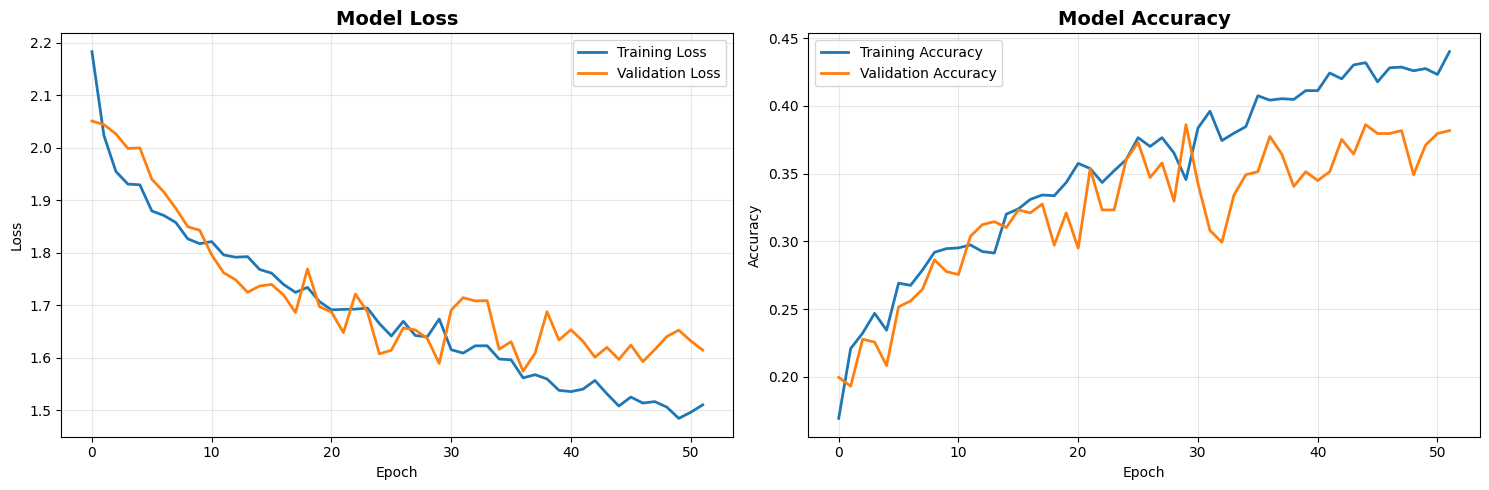

Confusion matrix saved to: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\plots\lstm_confusion_matrix.png


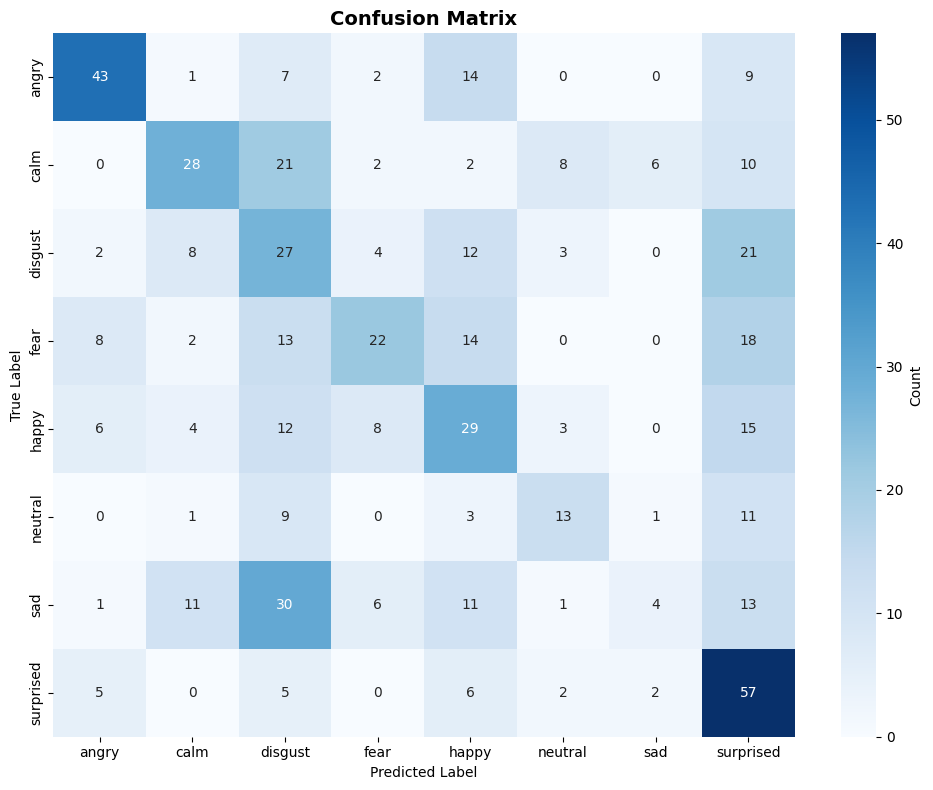


Normalized Confusion Matrix:
           angry   calm  disgust   fear  happy  neutral    sad  surprised
angry      0.566  0.013    0.092  0.026  0.184    0.000  0.000      0.118
calm       0.000  0.364    0.273  0.026  0.026    0.104  0.078      0.130
disgust    0.026  0.104    0.351  0.052  0.156    0.039  0.000      0.273
fear       0.104  0.026    0.169  0.286  0.182    0.000  0.000      0.234
happy      0.078  0.052    0.156  0.104  0.377    0.039  0.000      0.195
neutral    0.000  0.026    0.237  0.000  0.079    0.342  0.026      0.289
sad        0.013  0.143    0.390  0.078  0.143    0.013  0.052      0.169
surprised  0.065  0.000    0.065  0.000  0.078    0.026  0.026      0.740


In [10]:
y_pred_lstm, y_true = trainer_lstm.evaluate(model_type="lstm")
trainer_lstm.plot_training_history(save_path=os.path.join(RESULTS_PATH, "plots", "lstm_training_history.png"))
trainer_lstm.plot_confusion_matrix(y_pred_lstm, y_true, save_path=os.path.join(RESULTS_PATH, "plots", "lstm_confusion_matrix.png"))

In [11]:
trainer_lstm.print_classification_report(y_pred_lstm, y_true)
trainer_lstm.save_results("lstm", y_pred_lstm, y_true)


CLASSIFICATION REPORT
              precision    recall  f1-score   support

       angry     0.6615    0.5658    0.6099        76
        calm     0.5091    0.3636    0.4242        77
     disgust     0.2177    0.3506    0.2687        77
        fear     0.5000    0.2857    0.3636        77
       happy     0.3187    0.3766    0.3452        77
     neutral     0.4333    0.3421    0.3824        38
         sad     0.3077    0.0519    0.0889        77
   surprised     0.3701    0.7403    0.4935        77

    accuracy                         0.3872       576
   macro avg     0.4148    0.3846    0.3721       576
weighted avg     0.4131    0.3872    0.3709       576


Results saved:
  - History: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\lstm_history.pkl
  - Predictions: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\lstm_predictions.csv


In [12]:
lstm_accuracy = accuracy_score(y_true, y_pred_lstm)
print(f"\nLSTM Test Accuracy: {lstm_accuracy:.4f}")


LSTM Test Accuracy: 0.3872


## CNN-LSTM Model

## Training

In [13]:
print("TRAINING CNN-LSTM MODEL...")
trainer_cnn_lstm = ModelTrainer(processed_data)
history_cnn_lstm = trainer_cnn_lstm.train(
    model_type="cnn_lstm",
    cnn_filters=[64, 128],
    lstm_units=[64],
    dropout_rate=0.3,
    batch_size=32,
    epochs=100,
    validation_split=0.2
)

TRAINING CNN-LSTM MODEL...

Building CNN_LSTM model...

MODEL: CNN_LSTM


Model: "CNN_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 382, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv_1 (BatchNormalization)  │ (None, 382, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_1 (MaxPooling1D)        │ (None, 191, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_conv_1 (Dropout)        │ (None, 191, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 191, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv_2 (BatchNormalization)  │ (None, 191, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_2 (MaxPooling1D)        │ (None, 95, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_conv_2 (Dropout)        │ (None, 95, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_lstm_1 (BatchNormalization)  │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense (Dropout)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,072 (312.78 KB)

 Trainable params: 79,560 (310.78 KB)

 Non-trainable params: 512 (2.00 KB)

Total parameters: 80,072
Trainable parameters: 79,560


Training CNN_LSTM model...
Training samples: 2304
Validation split: 0.2
Batch size: 32
Max epochs: 100
Epoch 1/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1517 - loss: 2.3345
Epoch 1: val_accuracy improved from None to 0.19523, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 1: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.1731 - loss: 2.2494 - val_accuracy: 0.1952 - val_loss: 2.0574 - learning_rate: 0.0010
Epoch 2/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2634 - loss: 1.9470
Epoch 2: val_accuracy improved from 0.19523 to 0.21258, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 2: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.2697 - loss: 1.9553 - val_accuracy: 0.2126 - val_loss: 2.0394 - learning_rate: 0.0010
Epoch 3/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3195 - loss: 1.8577
Epoch 3: val_accuracy did not improve from 0.21258
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.3066 - loss: 1.8546 - val_accuracy: 0.2039 - val_loss: 2.0290 - learning_rate: 0.0010
Epoch 4/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3438 - loss: 1.7273
Epoch 4: val_accuracy improved from 0.21258 to 0.22777, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 4: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.3407 - loss: 1.7386 - val_accuracy: 0.2278 - val_loss: 1.9893 - learning_rate: 0.0010
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3680 - loss: 1.6784
Epoch 5: val_accuracy improved from 0.22777 to 0.23210, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 5: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.3706 - loss: 1.6682 - val_accuracy: 0.2321 - val_loss: 1.9194 - learning_rate: 0.0010
Epoch 6/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3720 - loss: 1.6641
Epoch 6: val_accuracy improved from 0.23210 to 0.27983, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 6: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.3700 - loss: 1.6593 - val_accuracy: 0.2798 - val_loss: 1.8431 - learning_rate: 0.0010
Epoch 7/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4030 - loss: 1.5879
Epoch 7: val_accuracy improved from 0.27983 to 0.36443, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 7: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.3928 - loss: 1.6076 - val_accuracy: 0.3644 - val_loss: 1.6865 - learning_rate: 0.0010
Epoch 8/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3951 - loss: 1.5593
Epoch 8: val_accuracy improved from 0.36443 to 0.39262, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 8: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.4004 - loss: 1.5537 - val_accuracy: 0.3926 - val_loss: 1.6132 - learning_rate: 0.0010
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4462 - loss: 1.4939
Epoch 9: val_accuracy improved from 0.39262 to 0.46855, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 9: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.4400 - loss: 1.4961 - val_accuracy: 0.4685 - val_loss: 1.5043 - learning_rate: 0.0010
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4651 - loss: 1.4370
Epoch 10: val_accuracy improved from 0.46855 to 0.47722, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 10: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.4406 - loss: 1.4752 - val_accuracy: 0.4772 - val_loss: 1.4125 - learning_rate: 0.0010
Epoch 11/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4585 - loss: 1.4760
Epoch 11: val_accuracy improved from 0.47722 to 0.49241, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 11: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.4666 - loss: 1.4653 - val_accuracy: 0.4924 - val_loss: 1.3751 - learning_rate: 0.0010
Epoch 12/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4856 - loss: 1.4228
Epoch 12: val_accuracy improved from 0.49241 to 0.51193, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 12: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.4829 - loss: 1.4274 - val_accuracy: 0.5119 - val_loss: 1.3144 - learning_rate: 0.0010
Epoch 13/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4933 - loss: 1.3707
Epoch 13: val_accuracy did not improve from 0.51193
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.4970 - loss: 1.3623 - val_accuracy: 0.4816 - val_loss: 1.3752 - learning_rate: 0.0010
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5008 - loss: 1.3462
Epoch 14: val_accuracy did not improve from 0.51193
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.4981 - loss: 1.3545 - val_accuracy: 0.4989 - val_loss: 1.2806 - learning_rate: 0.0010
Epoch 15/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5146 - loss: 1.3150
Epoch 15: val_accuracy improved from 0.51193 to 0.5


Epoch 15: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5296 - loss: 1.2931 - val_accuracy: 0.5249 - val_loss: 1.2813 - learning_rate: 0.0010
Epoch 16/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5279 - loss: 1.2666
Epoch 16: val_accuracy improved from 0.52495 to 0.54447, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 16: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.5431 - loss: 1.2615 - val_accuracy: 0.5445 - val_loss: 1.2828 - learning_rate: 0.0010
Epoch 17/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5565 - loss: 1.2480
Epoch 17: val_accuracy improved from 0.54447 to 0.55315, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 17: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.5600 - loss: 1.2299 - val_accuracy: 0.5531 - val_loss: 1.2291 - learning_rate: 0.0010
Epoch 18/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5788 - loss: 1.1960
Epoch 18: val_accuracy improved from 0.55315 to 0.55748, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 18: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5632 - loss: 1.2114 - val_accuracy: 0.5575 - val_loss: 1.2131 - learning_rate: 0.0010
Epoch 19/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5885 - loss: 1.1742
Epoch 19: val_accuracy improved from 0.55748 to 0.57050, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 19: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.5800 - loss: 1.1822 - val_accuracy: 0.5705 - val_loss: 1.1539 - learning_rate: 0.0010
Epoch 20/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5559 - loss: 1.2314
Epoch 20: val_accuracy improved from 0.57050 to 0.57918, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 20: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5746 - loss: 1.1873 - val_accuracy: 0.5792 - val_loss: 1.1573 - learning_rate: 0.0010
Epoch 21/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5970 - loss: 1.1438
Epoch 21: val_accuracy did not improve from 0.57918
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5806 - loss: 1.1444 - val_accuracy: 0.5597 - val_loss: 1.1997 - learning_rate: 0.0010
Epoch 22/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6172 - loss: 1.0513
Epoch 22: val_accuracy improved from 0.57918 to 0.59653, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 22: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.6126 - loss: 1.0769 - val_accuracy: 0.5965 - val_loss: 1.1169 - learning_rate: 0.0010
Epoch 23/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6243 - loss: 1.0859
Epoch 23: val_accuracy did not improve from 0.59653
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.6175 - loss: 1.0957 - val_accuracy: 0.5727 - val_loss: 1.1176 - learning_rate: 0.0010
Epoch 24/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6359 - loss: 1.0276
Epoch 24: val_accuracy did not improve from 0.59653
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6267 - loss: 1.0414 - val_accuracy: 0.5965 - val_loss: 1.0775 - learning_rate: 0.0010
Epoch 25/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6452 - loss: 0.9946
Epoch 25: val_accuracy did not improve from 0.59653


Epoch 26: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.6614 - loss: 0.9676 - val_accuracy: 0.6095 - val_loss: 1.0875 - learning_rate: 0.0010
Epoch 27/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6776 - loss: 0.9135
Epoch 27: val_accuracy did not improve from 0.60954
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.6625 - loss: 0.9566 - val_accuracy: 0.6009 - val_loss: 1.0989 - learning_rate: 0.0010
Epoch 28/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6652 - loss: 0.9447
Epoch 28: val_accuracy did not improve from 0.60954
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6565 - loss: 0.9592 - val_accuracy: 0.6052 - val_loss: 1.0858 - learning_rate: 0.0010
Epoch 29/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6621 - loss: 0.9778
Epoch 29: val_accuracy improved from 0.60954 to 0.6


Epoch 29: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.6641 - loss: 0.9447 - val_accuracy: 0.6443 - val_loss: 1.0192 - learning_rate: 0.0010
Epoch 30/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6987 - loss: 0.8875
Epoch 30: val_accuracy did not improve from 0.64425
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6804 - loss: 0.8912 - val_accuracy: 0.6226 - val_loss: 1.0198 - learning_rate: 0.0010
Epoch 31/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6941 - loss: 0.8416
Epoch 31: val_accuracy did not improve from 0.64425
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6826 - loss: 0.8630 - val_accuracy: 0.6204 - val_loss: 1.0309 - learning_rate: 0.0010
Epoch 32/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6931 - loss: 0.8352
Epoch 32: val_accuracy improved from 0.64425 to 0.6


Epoch 32: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.6934 - loss: 0.8602 - val_accuracy: 0.6681 - val_loss: 0.9773 - learning_rate: 0.0010
Epoch 33/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7022 - loss: 0.8443
Epoch 33: val_accuracy did not improve from 0.66811
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7010 - loss: 0.8534 - val_accuracy: 0.6464 - val_loss: 0.9804 - learning_rate: 0.0010
Epoch 34/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7021 - loss: 0.8148
Epoch 34: val_accuracy did not improve from 0.66811
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7016 - loss: 0.8324 - val_accuracy: 0.6508 - val_loss: 0.9416 - learning_rate: 0.0010
Epoch 35/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7266 - loss: 0.7781
Epoch 35: val_accuracy did not improve from 0.66811


Epoch 37: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.7499 - loss: 0.7208 - val_accuracy: 0.6725 - val_loss: 0.9479 - learning_rate: 0.0010
Epoch 38/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7597 - loss: 0.7006
Epoch 38: val_accuracy improved from 0.67245 to 0.68764, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 38: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.7558 - loss: 0.7007 - val_accuracy: 0.6876 - val_loss: 0.9029 - learning_rate: 0.0010
Epoch 39/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7466 - loss: 0.7107
Epoch 39: val_accuracy did not improve from 0.68764
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7461 - loss: 0.7217 - val_accuracy: 0.6855 - val_loss: 0.9367 - learning_rate: 0.0010
Epoch 40/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7772 - loss: 0.6560
Epoch 40: val_accuracy improved from 0.68764 to 0.71150, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 40: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.7672 - loss: 0.6691 - val_accuracy: 0.7115 - val_loss: 0.8985 - learning_rate: 0.0010
Epoch 41/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7719 - loss: 0.6405
Epoch 41: val_accuracy did not improve from 0.71150
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.7618 - loss: 0.6735 - val_accuracy: 0.6941 - val_loss: 0.9247 - learning_rate: 0.0010
Epoch 42/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7986 - loss: 0.5894
Epoch 42: val_accuracy did not improve from 0.71150
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7846 - loss: 0.6247 - val_accuracy: 0.6985 - val_loss: 0.9005 - learning_rate: 0.0010
Epoch 43/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7817 - loss: 0.6199
Epoch 43: val_accuracy did not improve from 0.71150


Epoch 45: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7878 - loss: 0.6092 - val_accuracy: 0.7440 - val_loss: 0.8228 - learning_rate: 0.0010
Epoch 46/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8179 - loss: 0.5406
Epoch 46: val_accuracy did not improve from 0.74403
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8090 - loss: 0.5465 - val_accuracy: 0.7419 - val_loss: 0.8037 - learning_rate: 0.0010
Epoch 47/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8029 - loss: 0.5683
Epoch 47: val_accuracy improved from 0.74403 to 0.75705, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 47: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7976 - loss: 0.5687 - val_accuracy: 0.7570 - val_loss: 0.8676 - learning_rate: 0.0010
Epoch 48/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8102 - loss: 0.5461
Epoch 48: val_accuracy did not improve from 0.75705
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8058 - loss: 0.5631 - val_accuracy: 0.7505 - val_loss: 0.8141 - learning_rate: 0.0010
Epoch 49/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8242 - loss: 0.4942
Epoch 49: val_accuracy did not improve from 0.75705
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.8085 - loss: 0.5419 - val_accuracy: 0.7419 - val_loss: 0.8326 - learning_rate: 0.0010
Epoch 50/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8269 - loss: 0.5157
Epoch 50: val_accuracy did not improve from 0.75705


Epoch 52: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8367 - loss: 0.4742 - val_accuracy: 0.7722 - val_loss: 0.7976 - learning_rate: 5.0000e-04
Epoch 53/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8443 - loss: 0.4426
Epoch 53: val_accuracy did not improve from 0.77223
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.8399 - loss: 0.4651 - val_accuracy: 0.7701 - val_loss: 0.7737 - learning_rate: 5.0000e-04
Epoch 54/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8600 - loss: 0.4176
Epoch 54: val_accuracy improved from 0.77223 to 0.79393, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5



Epoch 54: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.8578 - loss: 0.4291 - val_accuracy: 0.7939 - val_loss: 0.7475 - learning_rate: 5.0000e-04
Epoch 55/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8472 - loss: 0.4529
Epoch 55: val_accuracy did not improve from 0.79393
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.8524 - loss: 0.4302 - val_accuracy: 0.7831 - val_loss: 0.7787 - learning_rate: 5.0000e-04
Epoch 56/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8665 - loss: 0.4008
Epoch 56: val_accuracy did not improve from 0.79393
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8714 - loss: 0.3950 - val_accuracy: 0.7722 - val_loss: 0.7903 - learning_rate: 5.0000e-04
Epoch 57/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8705 - loss: 0.3856
Epoch 57: val_accuracy did not improve 


Epoch 58: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.8681 - loss: 0.3863 - val_accuracy: 0.7983 - val_loss: 0.7830 - learning_rate: 5.0000e-04
Epoch 59/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8659 - loss: 0.3996
Epoch 59: val_accuracy did not improve from 0.79826
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8562 - loss: 0.4232 - val_accuracy: 0.7896 - val_loss: 0.7423 - learning_rate: 5.0000e-04
Epoch 60/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8662 - loss: 0.3733
Epoch 60: val_accuracy did not improve from 0.79826
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8676 - loss: 0.3677 - val_accuracy: 0.7983 - val_loss: 0.7674 - learning_rate: 5.0000e-04
Epoch 61/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8798 - loss: 0.3730
Epoch 61: val_accuracy did not improve 


Epoch 62: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\cnn_lstm_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8649 - loss: 0.4075 - val_accuracy: 0.8026 - val_loss: 0.7339 - learning_rate: 5.0000e-04
Epoch 63/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8765 - loss: 0.3705
Epoch 63: val_accuracy did not improve from 0.80260
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8790 - loss: 0.3704 - val_accuracy: 0.7874 - val_loss: 0.7285 - learning_rate: 5.0000e-04
Epoch 64/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8826 - loss: 0.3506
Epoch 64: val_accuracy did not improve from 0.80260
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8747 - loss: 0.3675 - val_accuracy: 0.7809 - val_loss: 0.7509 - learning_rate: 5.0000e-04
Epoch 65/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8729 - loss: 0.3583
Epoch 65: val_accuracy did not improve 

## Evaluation

Training history plot saved to: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\plots\cnn_lstm_training_history.png


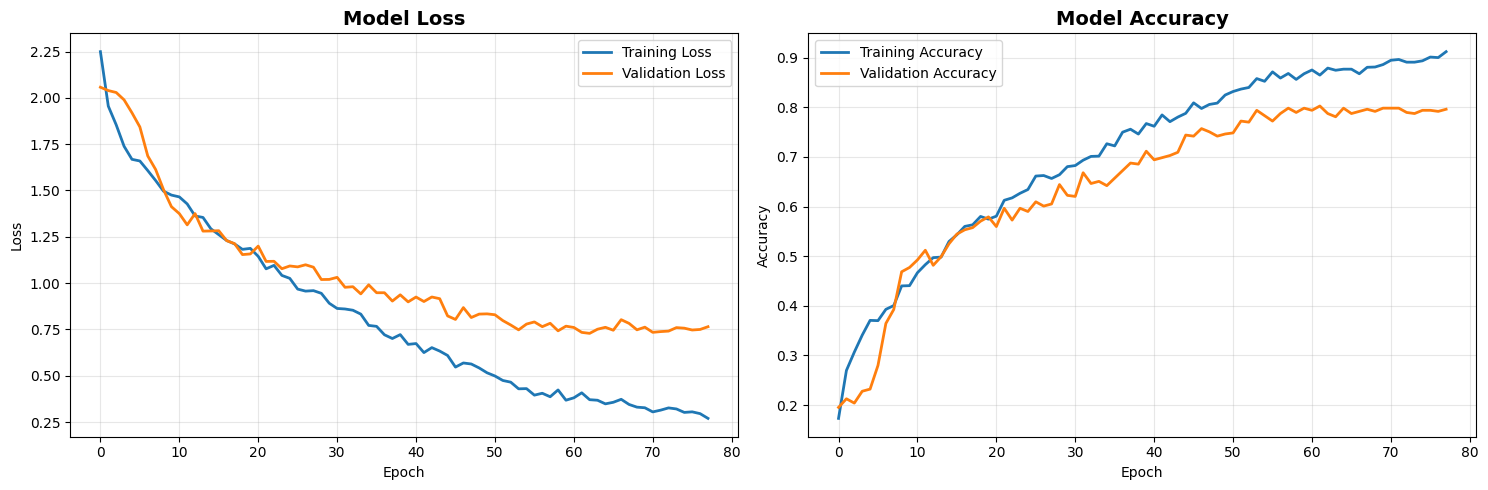

Confusion matrix saved to: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\plots\cnn_lstm_confusion_matrix.png


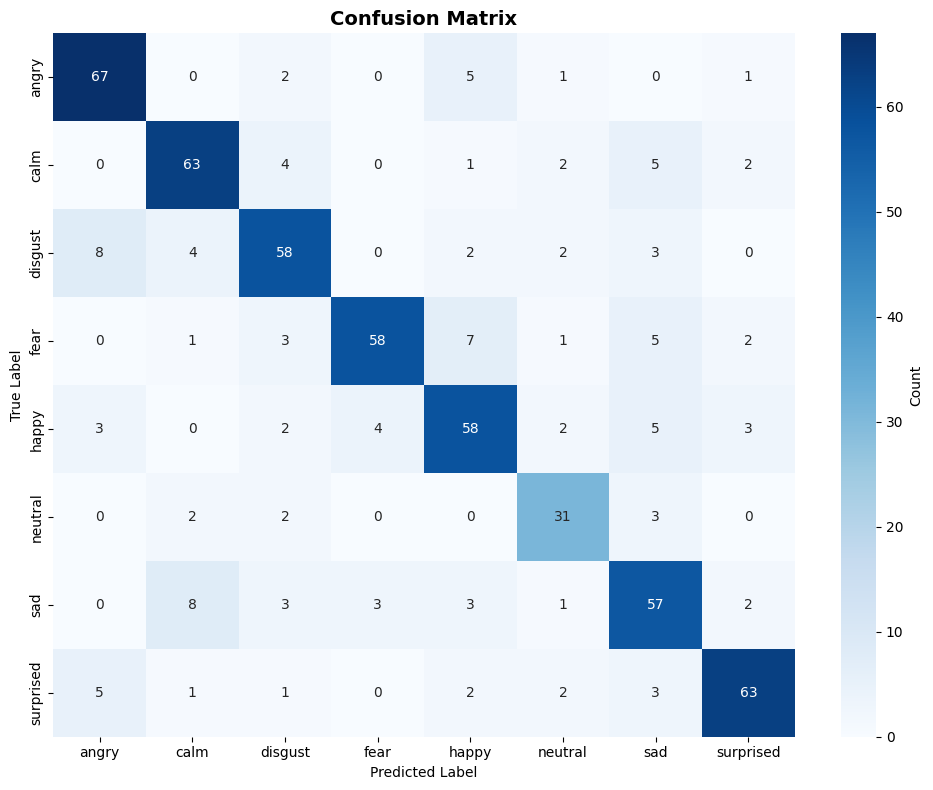


Normalized Confusion Matrix:
           angry   calm  disgust   fear  happy  neutral    sad  surprised
angry      0.882  0.000    0.026  0.000  0.066    0.013  0.000      0.013
calm       0.000  0.818    0.052  0.000  0.013    0.026  0.065      0.026
disgust    0.104  0.052    0.753  0.000  0.026    0.026  0.039      0.000
fear       0.000  0.013    0.039  0.753  0.091    0.013  0.065      0.026
happy      0.039  0.000    0.026  0.052  0.753    0.026  0.065      0.039
neutral    0.000  0.053    0.053  0.000  0.000    0.816  0.079      0.000
sad        0.000  0.104    0.039  0.039  0.039    0.013  0.740      0.026
surprised  0.065  0.013    0.013  0.000  0.026    0.026  0.039      0.818


In [14]:
y_pred_cnn_lstm, y_tru = trainer_cnn_lstm.evaluate(model_type="cnn_lstm")
trainer_cnn_lstm.plot_training_history(save_path=os.path.join(RESULTS_PATH, "plots", "cnn_lstm_training_history.png"))
trainer_cnn_lstm.plot_confusion_matrix(y_pred_cnn_lstm, y_true, save_path=os.path.join(RESULTS_PATH, "plots", "cnn_lstm_confusion_matrix.png"))

In [15]:
trainer_cnn_lstm.print_classification_report(y_pred_cnn_lstm, y_true)
trainer_cnn_lstm.save_results("cnn_lstm", y_pred_cnn_lstm, y_true)


CLASSIFICATION REPORT
              precision    recall  f1-score   support

       angry     0.8072    0.8816    0.8428        76
        calm     0.7975    0.8182    0.8077        77
     disgust     0.7733    0.7532    0.7632        77
        fear     0.8923    0.7532    0.8169        77
       happy     0.7436    0.7532    0.7484        77
     neutral     0.7381    0.8158    0.7750        38
         sad     0.7037    0.7403    0.7215        77
   surprised     0.8630    0.8182    0.8400        77

    accuracy                         0.7899       576
   macro avg     0.7898    0.7917    0.7894       576
weighted avg     0.7933    0.7899    0.7903       576


Results saved:
  - History: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\cnn_lstm_history.pkl
  - Predictions: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\cnn_lstm_predictions.csv


In [16]:
cnn_lstm_accuracy = accuracy_score(y_true, y_pred_cnn_lstm)
print(f"\nCNN-LSTM Test Accuracy: {cnn_lstm_accuracy:.4f}")


CNN-LSTM Test Accuracy: 0.7899


## Attention Model

## Training

In [19]:
print("TRAINING ATTENTIOIN MODEL...")
trainer_attention = ModelTrainer(processed_data)
history_attention = trainer_attention.train(
    model_type="attention",
    lstm_units=128,
    dropout_rate=0.3,
    batch_size=32,
    epochs=100,
    validation_split=0.2
)

TRAINING ATTENTIOIN MODEL...

Building ATTENTION model...




MODEL: Attention_LSTM


Model: "Attention_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 382, 1)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 382, 128)  │     66,560 │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_dense     │ (None, 382, 1)    │        129 │ lstm[0][0]        │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_flatten   │ (None, 382)       │          0 │ attention_dense[… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_softmax   │ (None, 382)       │          0 │ attention_flatte… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_repeat    │ (None, 128, 382)  │          0 │ attention_softma… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_permute   │ (None, 382, 128)  │          0 │ attention_repeat… │
│ (Permute)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_multiply  │ (None, 382, 128)  │          0 │ lstm[0][0],       │
│ (Multiply)          │                   │            │ attention_permut… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_sum       │ (None, 128)       │          0 │ attention_multip… │
│ (Lambda)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ attention_sum[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn                  │ (None, 64)        │        256 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ bn[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 8)         │        520 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 75,721 (295.79 KB)

 Trainable params: 75,593 (295.29 KB)

 Non-trainable params: 128 (512.00 B)

Total parameters: 75,721
Trainable parameters: 75,593


Training ATTENTION model...
Training samples: 2304
Validation split: 0.2
Batch size: 32
Max epochs: 100
Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.1574 - loss: 2.1739
Epoch 1: val_accuracy improved from None to 0.14317, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\attention_best.h5



Epoch 1: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\attention_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 203ms/step - accuracy: 0.1682 - loss: 2.1142 - val_accuracy: 0.1432 - val_loss: 2.0676 - learning_rate: 0.0010
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.1754 - loss: 2.0586
Epoch 2: val_accuracy did not improve from 0.14317
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.1818 - loss: 2.0465 - val_accuracy: 0.1258 - val_loss: 2.0649 - learning_rate: 0.0010
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.1810 - loss: 2.0420
Epoch 3: val_accuracy improved from 0.14317 to 0.16920, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\attention_best.h5



Epoch 3: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\attention_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - accuracy: 0.1725 - loss: 2.0411 - val_accuracy: 0.1692 - val_loss: 2.0551 - learning_rate: 0.0010
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.1874 - loss: 2.0299
Epoch 4: val_accuracy did not improve from 0.16920
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 234ms/step - accuracy: 0.1774 - loss: 2.0207 - val_accuracy: 0.1605 - val_loss: 2.0609 - learning_rate: 0.0010
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.1712 - loss: 2.0280
Epoch 5: val_accuracy did not improve from 0.16920
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 235ms/step - accuracy: 0.1769 - loss: 2.0254 - val_accuracy: 0.1410 - val_loss: 2.0517 - learning_rate: 0.0010
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.1837 - loss: 2.0220
Epoch 6: val_accuracy improved from 0.16920 to 


Epoch 6: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\attention_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 240ms/step - accuracy: 0.1959 - loss: 2.0171 - val_accuracy: 0.1887 - val_loss: 2.0414 - learning_rate: 0.0010
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.1933 - loss: 1.9940
Epoch 7: val_accuracy did not improve from 0.18872
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 239ms/step - accuracy: 0.1959 - loss: 1.9985 - val_accuracy: 0.1497 - val_loss: 2.0453 - learning_rate: 0.0010
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.1818 - loss: 2.0185
Epoch 8: val_accuracy did not improve from 0.18872
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 241ms/step - accuracy: 0.1894 - loss: 2.0079 - val_accuracy: 0.1714 - val_loss: 2.0524 - learning_rate: 0.0010
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.2042 - loss: 1.9936
Epoch 9: val_accuracy did not improve from 0.18


Epoch 10: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\attention_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 248ms/step - accuracy: 0.2132 - loss: 1.9823 - val_accuracy: 0.1909 - val_loss: 1.9882 - learning_rate: 0.0010
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.1822 - loss: 1.9891
Epoch 11: val_accuracy did not improve from 0.19089
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 233ms/step - accuracy: 0.1883 - loss: 1.9875 - val_accuracy: 0.1562 - val_loss: 2.1016 - learning_rate: 0.0010
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.2092 - loss: 1.9647
Epoch 12: val_accuracy did not improve from 0.19089
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 214ms/step - accuracy: 0.2089 - loss: 1.9781 - val_accuracy: 0.1410 - val_loss: 2.1022 - learning_rate: 0.0010
Epoch 13/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.2103 - loss: 1.9943
Epoch 13: val_accuracy improved from 0.19


Epoch 13: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\attention_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 236ms/step - accuracy: 0.2062 - loss: 1.9742 - val_accuracy: 0.2234 - val_loss: 1.9775 - learning_rate: 0.0010
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.2347 - loss: 1.9485
Epoch 14: val_accuracy did not improve from 0.22343
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 239ms/step - accuracy: 0.2225 - loss: 1.9628 - val_accuracy: 0.2169 - val_loss: 1.9991 - learning_rate: 0.0010
Epoch 15/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.2168 - loss: 1.9815
Epoch 15: val_accuracy did not improve from 0.22343
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 235ms/step - accuracy: 0.2203 - loss: 1.9703 - val_accuracy: 0.2126 - val_loss: 1.9893 - learning_rate: 0.0010
Epoch 16/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.2099 - loss: 1.9664
Epoch 16: val_accuracy did not improve fr


Epoch 17: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\attention_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 244ms/step - accuracy: 0.2328 - loss: 1.9477 - val_accuracy: 0.2299 - val_loss: 1.9645 - learning_rate: 0.0010
Epoch 18/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.2358 - loss: 1.9496
Epoch 18: val_accuracy did not improve from 0.22993
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 239ms/step - accuracy: 0.2328 - loss: 1.9498 - val_accuracy: 0.2148 - val_loss: 1.9951 - learning_rate: 0.0010
Epoch 19/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.2270 - loss: 1.9602
Epoch 19: val_accuracy improved from 0.22993 to 0.26464, saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\attention_best.h5



Epoch 19: finished saving model to c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\models\saved_models\attention_best.h5
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 253ms/step - accuracy: 0.2415 - loss: 1.9368 - val_accuracy: 0.2646 - val_loss: 1.9256 - learning_rate: 0.0010
Epoch 20/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.2472 - loss: 1.9279
Epoch 20: val_accuracy did not improve from 0.26464
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 240ms/step - accuracy: 0.2371 - loss: 1.9574 - val_accuracy: 0.1866 - val_loss: 2.0920 - learning_rate: 0.0010
Epoch 21/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.2719 - loss: 1.8894
Epoch 21: val_accuracy did not improve from 0.26464
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 235ms/step - accuracy: 0.2556 - loss: 1.9103 - val_accuracy: 0.1974 - val_loss: 1.9774 - learning_rate: 0.0010
Epoch 22/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.2529 - loss: 1.9161
Epoch 22: val_accuracy did not improve fr

## Evaluation

Training history plot saved to: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\plots\attention_training_history.png


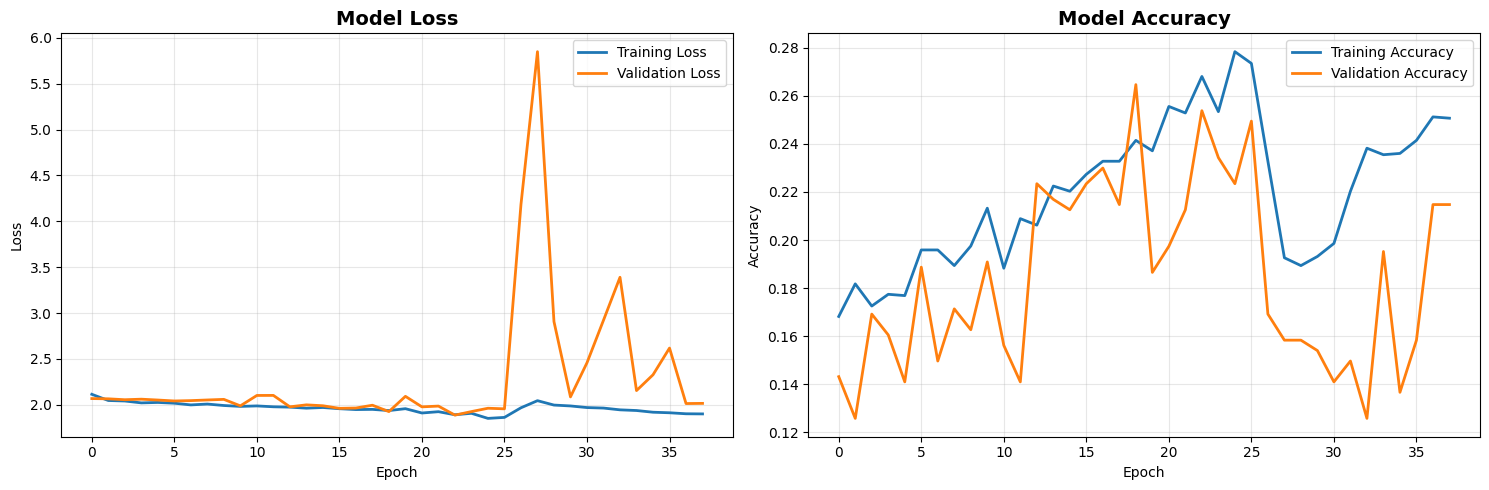

Confusion matrix saved to: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\plots\attention_confusion_matrix.png


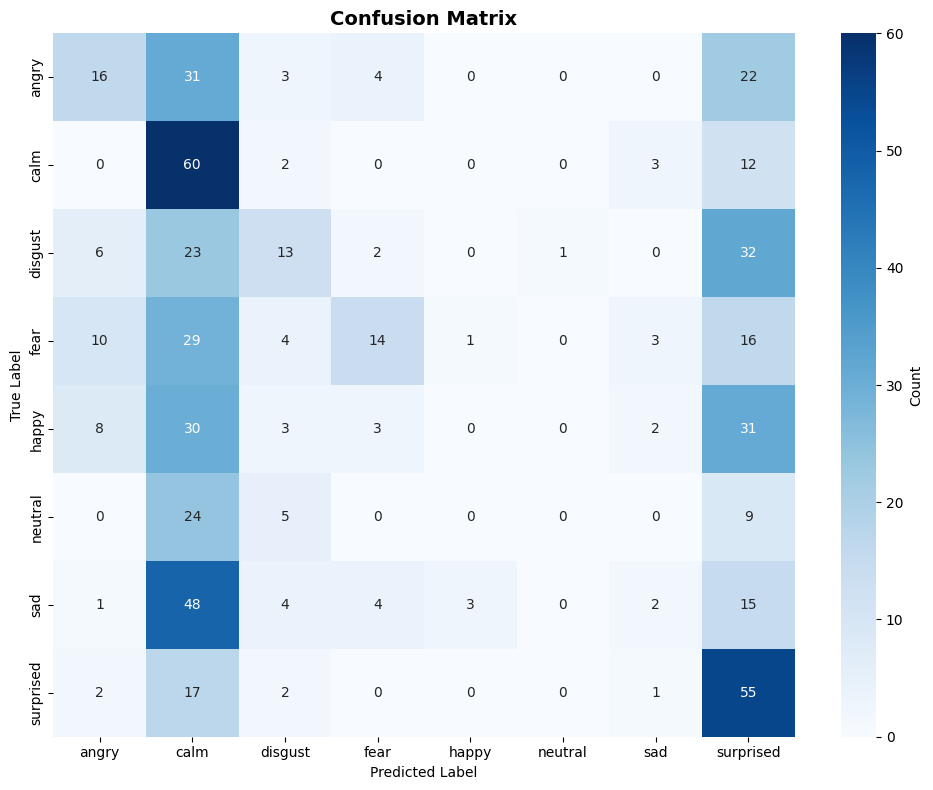


Normalized Confusion Matrix:
           angry   calm  disgust   fear  happy  neutral    sad  surprised
angry      0.211  0.408    0.039  0.053  0.000    0.000  0.000      0.289
calm       0.000  0.779    0.026  0.000  0.000    0.000  0.039      0.156
disgust    0.078  0.299    0.169  0.026  0.000    0.013  0.000      0.416
fear       0.130  0.377    0.052  0.182  0.013    0.000  0.039      0.208
happy      0.104  0.390    0.039  0.039  0.000    0.000  0.026      0.403
neutral    0.000  0.632    0.132  0.000  0.000    0.000  0.000      0.237
sad        0.013  0.623    0.052  0.052  0.039    0.000  0.026      0.195
surprised  0.026  0.221    0.026  0.000  0.000    0.000  0.013      0.714


In [20]:
y_pred_attention, y_true = trainer_attention.evaluate(model_type="attention")
trainer_attention.plot_training_history(save_path=os.path.join(RESULTS_PATH, "plots", "attention_training_history.png"))
trainer_attention.plot_confusion_matrix(y_pred_attention, y_true, save_path=os.path.join(RESULTS_PATH, "plots", "attention_confusion_matrix.png"))

In [21]:
trainer_attention.print_classification_report(y_pred_attention, y_true)
trainer_attention.save_results("attention", y_pred_attention, y_true)


CLASSIFICATION REPORT
              precision    recall  f1-score   support

       angry     0.3721    0.2105    0.2689        76
        calm     0.2290    0.7792    0.3540        77
     disgust     0.3611    0.1688    0.2301        77
        fear     0.5185    0.1818    0.2692        77
       happy     0.0000    0.0000    0.0000        77
     neutral     0.0000    0.0000    0.0000        38
         sad     0.1818    0.0260    0.0455        77
   surprised     0.2865    0.7143    0.4089        77

    accuracy                         0.2778       576
   macro avg     0.2436    0.2601    0.1971       576
weighted avg     0.2599    0.2778    0.2103       576


Results saved:
  - History: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\attention_history.pkl
  - Predictions: c:\Users\mnael\OneDrive\Documents\Nael\Code\VisualStudio\projects\speech-emotion-detection\results\attention_predictions.csv


In [23]:
attention_accuracy = accuracy_score(y_true, y_pred_attention)
print(f"Attention Test Accuracy: {attention_accuracy:.4f}")

Attention Test Accuracy: 0.2778


## Compare Models


MODEL COMPARISON
    Model  Test Accuracy  Best Val Accuracy  Final Training Accuracy
      CNN       0.918403           0.917570                 0.999457
 CNN-LSTM       0.789931           0.802603                 0.912100
     LSTM       0.387153           0.386117                 0.440043
Attention       0.277778           0.264642                 0.250678


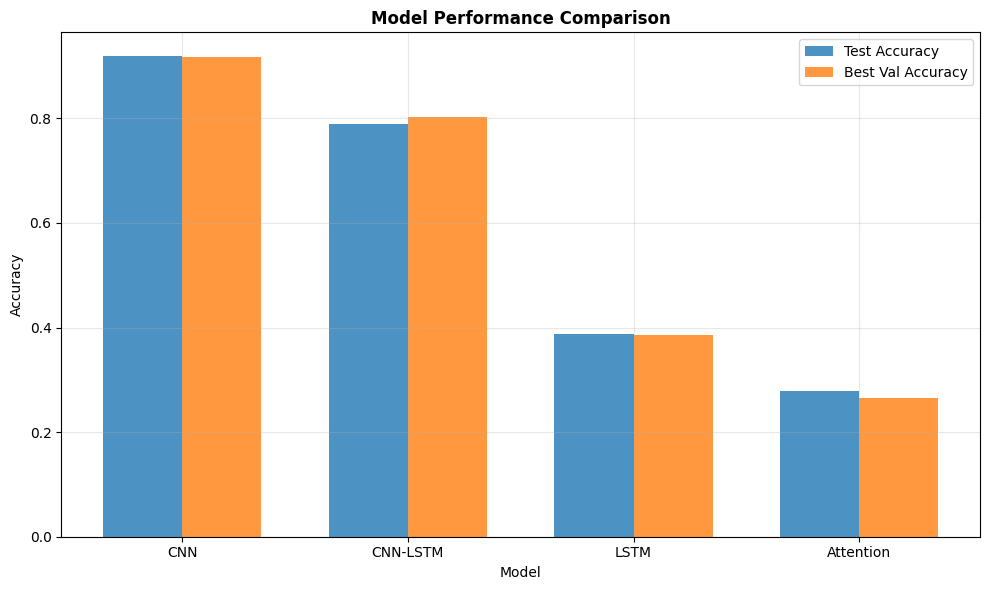

In [24]:
results = {
    "CNN": (cnn_accuracy, history_cnn),
    "LSTM": (lstm_accuracy, history_lstm),
    "CNN-LSTM": (cnn_lstm_accuracy, history_cnn_lstm),
    "Attention": (attention_accuracy, history_attention)
}

compare_models(results)

In [25]:
import pandas as pd

# Comparison DataFrame
comparison_data = {
    "Model": ["CNN", "LSTM", "CNN-LSTM", "Attention"],
    "Test Accuracy": [cnn_accuracy, lstm_accuracy, cnn_lstm_accuracy, attention_accuracy],
    "Parameters": [
        trainer_cnn.model.count_params(),
        trainer_lstm.model.count_params(),
        trainer_cnn_lstm.model.count_params(),
        trainer_attention.model.count_params()
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparision_df.sort_values("Test Accuracy", ascending=False)

print("MODEL COMPARISON:")
print(comparison_df.to_string(index=False))

NameError: name 'comparision_df' is not defined

NameError: name 'comparisoon_df' is not defined

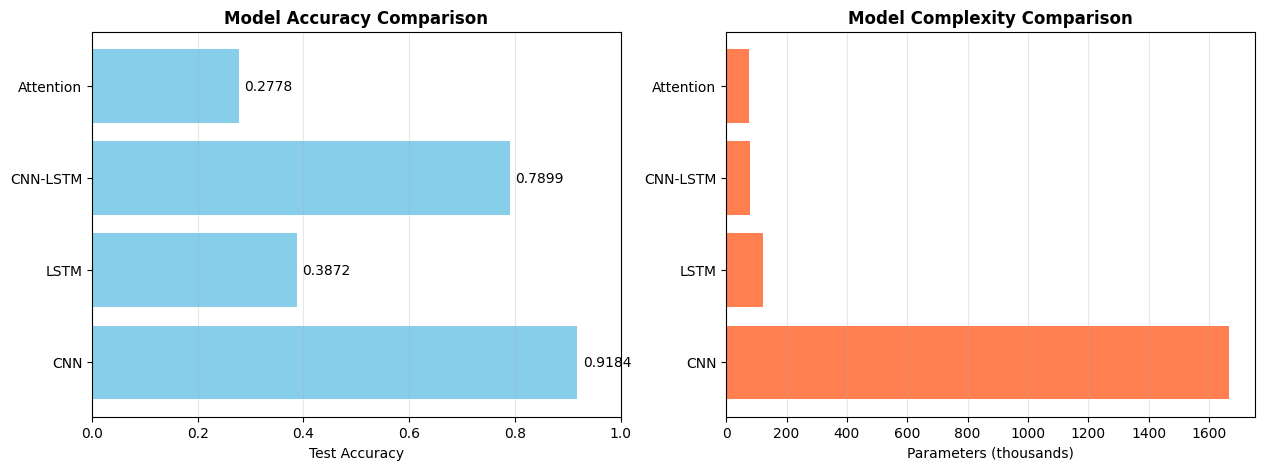

In [26]:
# Comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy comparison
axes[0].barh(comparison_df["Model"], comparison_df["Test Accuracy"], color="skyblue")
axes[0].set_xlabel("Test Accuracy")
axes[0].set_title("Model Accuracy Comparison", fontweight="bold")
axes[0].set_xlim([0, 1])
axes[0].grid(True, alpha=0.3, axis='x')

for i, v in enumerate(comparison_df["Test Accuracy"]):
    axes[0].text(v + 0.01, i, f"{v:.4f}", va="center")

# Parameters comparison
axes[1].barh(comparison_df["Model"], comparison_df["Parameters"] / 1000, color="coral")
axes[1].set_xlabel("Parameters (thousands)")
axes[1].set_title("Model Complexity Comparison", fontweight="bold")
axes[1].grid(True, alpha=0.3, axis='x')

for i, v in enumerate(comparisoon_df["Parameters"]):
    axes[1].text(v / 1000 + 5, i, f"{v / 1000:.1f}K", va="center")

plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PATH, "plots", "all_models_comparison.png"), dpi=300, bbox_inches="tight")
plt.show()

## Best Performing Model (by accuracy)

In [28]:
best_model = comparison_df.iloc[0]
print("BEST PERFORMING MODEL:")
print(f"\nModel: {best_model["Model"]}")
print(f"Test Accuracy: {best_model["Test Accuracy"]:.4f}")
print(f"Parameters: {best_model["Parameters"]}")

BEST PERFORMING MODEL:

Model: CNN
Test Accuracy: 0.9184
Parameters: 1667080
